In [86]:
import os
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

from sklearn import linear_model as lm
from sklearn import metrics
from sklearn import cross_validation as cv
from sklearn import grid_search

%matplotlib inline

# Data Loading & Cleaning

In [91]:
ww = pd.read_csv('../../Data/winequality_white.csv', sep = ';')
rw = pd.read_csv('../../Data/winequality_red.csv', sep = ';')

ww.rename(columns={
    'total sulfur dioxide': 'totalsulfurdioxide',
    'free sulfur dioxide': 'freesulfurdioxide',
    'residual sugar': 'residualsugar',
    'citric acid': 'citricacid',
    'volatile acidity': 'volatileacidity',
    'fixed acidity': 'fixedacidity'    
}, inplace=True)

# Remove missing values
ww.dropna(inplace=True)
rw.dropna(inplace=True)
ww[:5]

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Exploratory Analysis

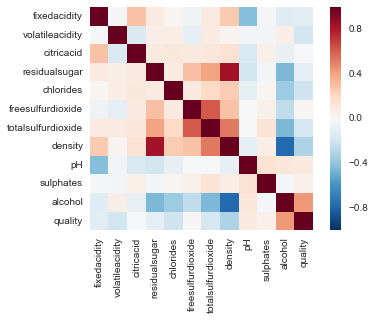

In [92]:
#correlation matrix
ww_matrix = ww.corr()

#correlation matric heatmap
sns.heatmap(ww_matrix, square=True)

# Regression Model

In [98]:
# Prepare data
predictors_all = ['alcohol', 'sulphates', 'pH', 'density', 'totalsulfurdioxide', 'freesulfurdioxide', 
                 'chlorides', 'residualsugar', 'citricacid', 'volatileacidity', 'fixedacidity']
response = 'quality'

X_1 = ww[predictors_all]
y = ww[response]

# Create linear regression object
model_all = lm.LinearRegression()

# Fit the model
model_all.fit(X_1, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
# OLS regression results
model_all.score(X_1, y)

0.28187036413328559

In [100]:
# Pair variable names and coefficients
list(zip(predictors_all, model_all.coef_))

[('alcohol', 0.19347569720487548),
 ('sulphates', 0.63147647270940155),
 ('pH', 0.68634374182185076),
 ('density', -150.28418060047795),
 ('totalsulfurdioxide', -0.00028574741872350659),
 ('freesulfurdioxide', 0.0037327651923674981),
 ('chlorides', -0.24727653669059468),
 ('residualsugar', 0.081482802637687327),
 ('citricacid', 0.022090200679821086),
 ('volatileacidity', -1.8631770921608708),
 ('fixedacidity', 0.065519961354742626)]

In [101]:
# Model_statsig only include statistically significant values, 
model_statsig = sm.formula.ols('quality ~ alcohol + sulphates + pH + density + freesulfurdioxide +\
                                residualsugar + volatileacidity + fixedacidity', data = ww).fit()

In [102]:
model_statsig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Mon, 23 May 2016   Prob (F-statistic):               0.00
Time:                        21:22:42   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept           154.1062     18.100      8.514      0.000       118.622   189.591
alcohol               0.1932      0.024      8.021      0.000         0.146     0.240
sulphates             0.6285      0.100      6.287      0.000         0.433     0.824
pH                    0.6942      0.103      6.717      0.000         0.492     0.897
density            -154.2913     18.344     -8.411      0.000      -190.254  -118.329
freesulfurdioxide     0.0033      0.001      4.950      0.000         0.002     0.005
residualsugar         0.0828      0.007     11.370      0.000         0.069     0.097
volatileacidity      -1.8881      0.110    -17.242      0.000        -2.103    -1.673
fixedacidity          0.0681      0.020      3.333      0.001         0.028     0.108
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Bonus Question: Cross Validation

In [110]:
mse_model_all = cv.cross_val_score(lm.LinearRegression(), ww[predictors_all], ww[response], scoring='mean_squared_error', cv=10)

# Fix the sign and compute average MSE
(-mse_model_all).mean()

0.57575689636207128

In [111]:
predictors_statsig = ['alcohol', 'sulphates', 'pH', 'density', 'freesulfurdioxide', 'residualsugar', 'volatileacidity', 
                      'fixedacidity']

mse_model_statsig = cv.cross_val_score(lm.LinearRegression(), ww[predictors_statsig], ww[response], scoring='mean_squared_error', cv=10)

# Fix the sign and compute average MSE
(-mse_model_statsig).mean()

0.57521441843513854

# Model Diagnostics

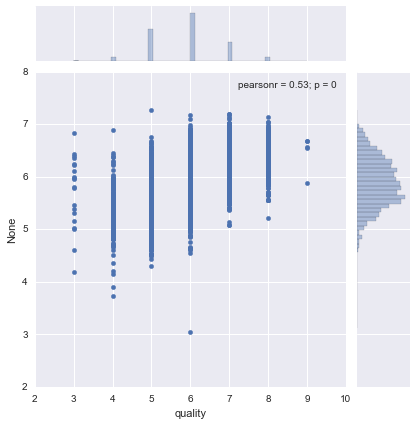

In [114]:
# Model_statsig has a lower MSE so producing model diagnostics for this model
# * Predicted versus observed; Looking for violations of linearity
sns.jointplot(ww['quality'], model_statsig.fittedvalues)

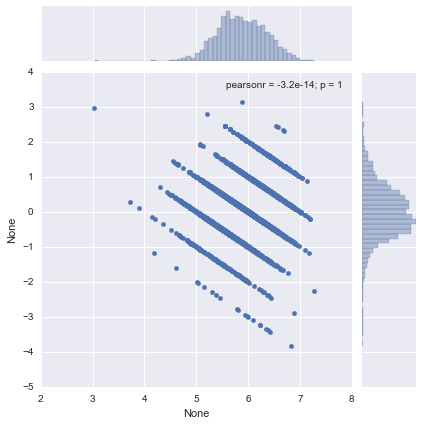

In [120]:
# * Residuals versus predicted; looking for violations of homoscedastcity
sns.jointplot(model_statsig.fittedvalues, model_statsig.resid)

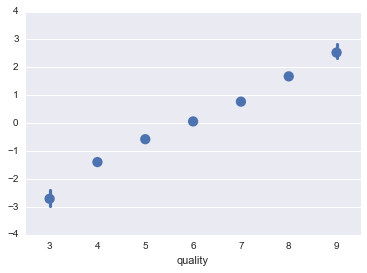

In [70]:
# * Residuals versus dependant variable
sns.pointplot(ww['quality'], model_statsig.resid, join=False)

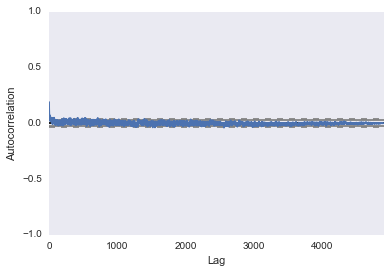

In [67]:
# * Autocorrelation plot; looking for violations of independence.. does this still hold for the data as it is not time series?!
pd.tools.plotting.autocorrelation_plot(model_statsig.resid)

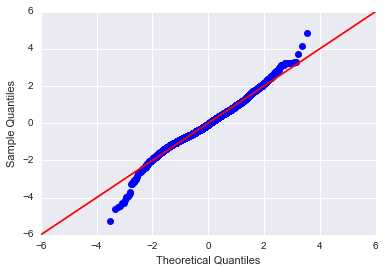

In [87]:
# * Normal Q-Q plot for (Studentised) residuals; looking for vilations of normality of the residuals
st_resid = model_statsig.get_influence().get_resid_studentized_external() # Studentised residuals
qq = sm.graphics.qqplot(st_resid)
smg.qqline(qq.gca(), '45')

# Bonus Question: Regularisation Techniques

In [15]:
kf = cv.KFold(len(ww), n_folds=10, shuffle=True)
model3_lasso = lm.LassoCV(cv=kf).fit(ww[predictors_all], ww[response])

In [18]:
list(zip(predictors_all, model3_lasso.coef_))

[('alcohol', 0.35550778069278177),
 ('sulphates', 0.0),
 ('pH', 0.0),
 ('density', -0.0),
 ('total sulfur dioxide', -0.0011034475465919035),
 ('free sulfur dioxide', 0.0056922036278384902),
 ('chlorides', -0.0),
 ('residual sugar', 0.022014285799413284),
 ('citric acid', 0.0),
 ('volatile acidity', -1.3039148923100545),
 ('fixed acidity', -0.051970230629116959)]

In [116]:
metrics.mean_squared_error(rw[response], model3_lasso.predict(rw[predictors_all]))

0.5505145148638444

In [117]:
metrics.mean_squared_error(ww[response], model3_lasso.predict(ww[predictors_all]))

0.57863685017508926